<a href="https://colab.research.google.com/github/Sedighe-Raeisi/karate_club_with_Pytorch_GCNConv/blob/main/KarateClub_Pytorch_GCNConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_geometric
!pip install torch_sparse
!pip install torch_scatter

#Making the Model:

In [ ]:
from torch.nn import Linear 
from torch_geometric.nn import GCNConv
from torch.nn import Module
import torch
import torch.nn.functional as F

In [ ]:
import numpy as np
import networkx as nx

To define the model we can use the instruction in the link: [link text](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html)

In [ ]:
class model(Module):
  def __init__(self,inn_chan,hidden_chan,out_chan):
    super(model, self).__init__()
    self.GCN1=GCNConv(inn_chan,hidden_chan)
    self.GCN2=GCNConv(hidden_chan,out_chan)
    self.lin=torch.nn.Linear(out_chan,2)
  def forward(self,x,edge_index):
    h=self.GCN1(x,edge_index)
    h=torch.relu(h)
    h=self.GCN2(h,edge_index)
    h=torch.relu(h)
    h=self.lin(h)
    h=F.softmax(h,1)
    return h

#Defining the graph

⭐ You can download the data 





*   as a pair of nodes with a common edge from this link: [link text](https://networkrepository.com/soc-karate.php)
*   or as an adjacency matrix from this link: [link text](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary)

There is a very important difference between these two links, the weight of each edge does not exist in the first link.





##Prepairing the dataset. Here I show how to prepare the data to feed into the model. 

1.   In the first method, we manually make features of nodes,  X, and the edge-index  
2.   In the second method we use the NetworkX and we import it to PyTorch. We can either define the graph in Networkx manually or use the karate club dataset in this library. 

In [ ]:
# !cp /content/karate_club_edge.txt -r /content/drive/MyDrive/MachineLearing/GNN

In [ ]:
# we read the edge indexes as a pair of integer numbers from a text file. 
# node indexes began from 1, we change them in order to begin from 0 to better fit with the python indexing format.
f=open('/content/drive/MyDrive/MachineLearing/GNN/karate_club_edge.txt','r')
src_node=[]
dst_node=[]
for i in range(78):
  edge=f.readline()
  
  src=int(edge.split()[0])-1
  dst=int(edge.split()[1])-1
  src_node.append(src)
  dst_node.append(dst)

In [ ]:
# src_node=[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 2, 3, 7, 13, 
#           17, 19, 21, 30, 3, 7, 8, 9, 13, 27, 28, 32, 7, 12, 13, 6, 10, 6, 10, 
#           16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32, 33, 32, 
#           33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32, 33, 
#           32, 33, 32, 33, 33]




In [ ]:
# dst_node=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 
#           1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 8, 8, 8, 9, 13,
#           14, 14, 15, 15, 18, 18, 19, 20, 20, 22, 22, 23, 23, 23, 23, 23, 24, 
#           24, 24, 25, 26, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32]


Now we have the graph structure: 👇

In [ ]:
edge_index = torch.tensor([src_node,
                           dst_node], dtype=torch.long)

Then we prepaire the featurs of each node. In an unaccepted and very simplified we use a constant integer for all nodes. 

In [ ]:
a=[]
for i in range(35):
  a+=[[1]]
# a

In [ ]:
len(a)

35

In [ ]:
X = torch.tensor(a, dtype=torch.float)

In [ ]:
X.size()

torch.Size([35, 1])

In [ ]:
edge_index.size()

torch.Size([2, 78])

Here we introduce the labeled nodes and their corresponding nodes: 👇

In [ ]:
labeled_nodes=torch.tensor([0, 33],dtype=int)
labels=torch.tensor([0, 1])

#Training

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np

##Training with a constant number as a node feature:

In [ ]:
karate_model=model(1,5,2)

In [ ]:
optimizer=torch.optim.Adam(karate_model.parameters())

In [ ]:
all_pred=[]
for epochs in range(1000):
  
  pred_label=karate_model(X,edge_index)
  all_pred.append(pred_label)
  loss=F.nll_loss(pred_label[labeled_nodes],labels)
  pred_y=np.argmax(pred_label[labeled_nodes].detach().numpy(), axis=1)
  true_y=labels.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epochs%100==0 :
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.5 , accuracy=0.5
epochs=100 , loss=-0.5 , accuracy=0.5
epochs=200 , loss=-0.4999999701976776 , accuracy=0.5
epochs=300 , loss=-0.4999999403953552 , accuracy=0.5
epochs=400 , loss=-0.5 , accuracy=0.5
epochs=500 , loss=-0.5 , accuracy=0.5
epochs=600 , loss=-0.4999999403953552 , accuracy=0.5
epochs=700 , loss=-0.5 , accuracy=0.5
epochs=800 , loss=-0.5 , accuracy=0.5
epochs=900 , loss=-0.5 , accuracy=0.5


##Training with node degrees as a feature: 

*   In this part I use the degree of each node as a feature. 
*   In order to calculate the degree of each node, I defined the graph as a NetwokX graph. Then I use the command '.degree' to calculate the degree of each node. 



###Prepairing the data

In [ ]:
import networkx as nx

In [ ]:
g=[]
for i in range(len(src_node)):
  g.append((src_node[i],dst_node[i]))


In [ ]:
G = nx.from_edgelist(g)

In [ ]:
G.degree

DegreeView({1: 9, 0: 16, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 10: 3, 11: 1, 12: 2, 13: 5, 17: 2, 19: 3, 21: 2, 31: 6, 30: 4, 9: 2, 27: 4, 28: 3, 32: 12, 16: 2, 33: 17, 14: 2, 15: 2, 18: 2, 20: 2, 22: 2, 25: 3, 23: 5, 29: 4, 24: 3, 26: 2})

In [ ]:
a=[]
for i in range(34):
  a+=[G.degree[i]]

###Training with node degrees as feature:

In [ ]:
karate_model=model(1,5,2)

In [ ]:
optimizer=torch.optim.Adam(karate_model.parameters())

In [ ]:
all_pred=[]
for epochs in range(1000):
  pred_label=karate_model(X,edge_index)
  all_pred.append(pred_label)
  loss=F.nll_loss(pred_label[labeled_nodes],labels)
  pred_y=np.argmax(pred_label[labeled_nodes].detach().numpy(), axis=1)
  true_y=labels.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epochs%100==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.49729353189468384 , accuracy=0.5
epochs=100 , loss=-0.5004770159721375 , accuracy=0.5
epochs=200 , loss=-0.5059918761253357 , accuracy=0.5
epochs=300 , loss=-0.5221278071403503 , accuracy=0.5
epochs=400 , loss=-0.5470114946365356 , accuracy=1.0
epochs=500 , loss=-0.5789389610290527 , accuracy=1.0
epochs=600 , loss=-0.6165317893028259 , accuracy=1.0
epochs=700 , loss=-0.6576504707336426 , accuracy=1.0
epochs=800 , loss=-0.7003817558288574 , accuracy=1.0
epochs=900 , loss=-0.7418859004974365 , accuracy=1.0


##Training with embedding:

*   When we have no feature for nodes and we only have the structure of the graph, we can use the node embedding as feature input of the model. 
*   Then, during the training, both the model parameters and the parameters of node embeddings would be found. 



In [ ]:
embed = torch.nn.Embedding(35, 5)
X=embed.weight
X=X.requires_grad_(True)

In [ ]:
karate_model=model(5,5,2)

In [ ]:
from itertools import chain 
optimizer=torch.optim.Adam(chain(karate_model.parameters(),embed.parameters()))

In [ ]:
all_pred=[]
all_loss=[]
for epochs in range(1000):
  pred_label=karate_model(X,edge_index)
  all_pred.append(pred_label)
  loss=F.nll_loss(pred_label[labeled_nodes],labels)
  pred_y=np.argmax(pred_label[labeled_nodes].detach().numpy(), axis=1)
  true_y=labels.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  all_loss.append(loss.item())
  optimizer.step()
  if epochs%100==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.5467208623886108 , accuracy=0.5
epochs=100 , loss=-0.7794175148010254 , accuracy=1.0
epochs=200 , loss=-0.8569289445877075 , accuracy=1.0
epochs=300 , loss=-0.8853167295455933 , accuracy=1.0
epochs=400 , loss=-0.9042301177978516 , accuracy=1.0
epochs=500 , loss=-0.9185693264007568 , accuracy=1.0
epochs=600 , loss=-0.9299200773239136 , accuracy=1.0
epochs=700 , loss=-0.9391255378723145 , accuracy=1.0
epochs=800 , loss=-0.9466992020606995 , accuracy=1.0
epochs=900 , loss=-0.9530029296875 , accuracy=1.0


#This time, I use the NetworkX Karate dataset and node embedding.

*   I use the edge index of this dataset and then transform it into the torch.
*   In this dataset, we have the labels of all nodes after split up. I use it to better estimate the accuracy of the model. 


*   I can use the node degree as a feature. But I skip it and again I use the node embedding.
*   In the following you can see the structure of this dataset.






In [ ]:
import networkx as nx

In [ ]:
G = nx.karate_club_graph()


In [ ]:
from torch_geometric.utils import from_networkx

In [ ]:
G_data=from_networkx(G)

In [ ]:
G_data

Data(edge_index=[2, 156], club=[34], num_nodes=34)

In [ ]:
edge_index=G_data.edge_index

In [ ]:
embed = torch.nn.Embedding(34, 5)
X=embed.weight
X=X.requires_grad_(True)

In [ ]:
set(G_data.club)

{'Mr. Hi', 'Officer'}

In [ ]:
y=[1 if i=='Officer' else 0 for i in G_data.club]

In [ ]:
y=torch.tensor(y)

In [ ]:
karate_model=model(5,5,2)

In [ ]:
from itertools import chain
optimizer=torch.optim.Adam(chain(karate_model.parameters(),embed.parameters()))

In [ ]:
all_loss=[]
for epochs in range(1000):
  
  pred_label=karate_model(X,edge_index)
  loss=F.nll_loss(pred_label,y)
  pred_y=np.argmax(pred_label.detach().numpy(), axis=1)
  true_y=y.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  all_loss.append(loss.item())
  optimizer.step()
  if epochs%100==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.5058873295783997 , accuracy=0.5
epochs=100 , loss=-0.5474259853363037 , accuracy=0.5
epochs=200 , loss=-0.6403480172157288 , accuracy=0.5
epochs=300 , loss=-0.707226037979126 , accuracy=0.8235294117647058
epochs=400 , loss=-0.7573145627975464 , accuracy=0.9411764705882353
epochs=500 , loss=-0.7932469844818115 , accuracy=0.9411764705882353
epochs=600 , loss=-0.8183117508888245 , accuracy=0.9411764705882353
epochs=700 , loss=-0.8370027542114258 , accuracy=0.9411764705882353
epochs=800 , loss=-0.851941704750061 , accuracy=0.9411764705882353
epochs=900 , loss=-0.8641709089279175 , accuracy=0.9411764705882353


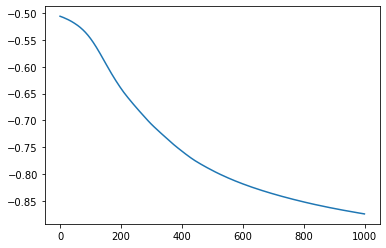

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_loss)

#Considering the weight of edges

*   Using the **adjacency** matrix instead of edge-index.
*   Using the Networkx dataset labels. 
*   Using the node embedding.









In [ ]:
!wget http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat

--2022-07-06 11:19:02--  http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat
Resolving vlado.fmf.uni-lj.si (vlado.fmf.uni-lj.si)... 193.2.67.80
Connecting to vlado.fmf.uni-lj.si (vlado.fmf.uni-lj.si)|193.2.67.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4849 (4.7K) [text/plain]
Saving to: ‘zachary.dat.1’

zachary.dat.1       100%[===================>]   4.74K  30.1KB/s    in 0.2s    

2022-07-06 11:19:03 (30.1 KB/s) - ‘zachary.dat.1’ saved [4849/4849]



Note! the file contains two matrix, the first 34 rows belong to adj matrix with weightless edges. We should use the second 34 rows.

In [ ]:
f=open('/content/zachary.dat','r')
adj=[]
for i in range(75):
  line=f.readline()
  if i>40:
    # print(line.split())
    row=[int(j) for j in line.split()]
    adj=adj+[row]
adj=np.array(adj)

In [ ]:
adj

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [ ]:
adj.shape

(34, 34)

In [ ]:
G = nx.from_numpy_matrix(adj,create_using=nx.MultiGraph)


In [ ]:
G=G.to_undirected()

In [ ]:
from torch_geometric.utils import from_networkx

In [ ]:
G_data_w=from_networkx(G)

In [ ]:
G_data_w

Data(edge_index=[2, 156], weight=[156], num_nodes=34)

In [ ]:
G_data_w.weight

tensor([4, 5, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 4, 6, 3, 4, 5, 1, 2, 2,
        2, 5, 6, 3, 4, 5, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 5, 3, 3,
        3, 2, 5, 3, 2, 4, 4, 3, 2, 5, 3, 3, 4, 1, 2, 2, 3, 3, 3, 1, 3, 3, 5, 3,
        3, 3, 3, 2, 3, 4, 3, 3, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 2, 3, 5, 4, 3,
        5, 4, 2, 3, 2, 5, 2, 7, 4, 2, 2, 4, 3, 4, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3,
        3, 2, 2, 7, 2, 4, 4, 2, 3, 3, 3, 1, 3, 2, 5, 4, 3, 4, 5, 4, 2, 3, 2, 4,
        2, 1, 1, 3, 4, 2, 4, 2, 2, 3, 4, 5])

In [ ]:
edge_weight=G_data_w.weight

In [ ]:
edge_weight=edge_weight.float()

In [ ]:
edge_index=G_data_w.edge_index

In [ ]:
embed = torch.nn.Embedding(34, 5)
X=embed.weight
X=X.requires_grad_(True)

In [ ]:
y=[1 if i=='Officer' else 0 for i in G_data.club]

In [ ]:
y=torch.tensor(y)

In [324]:
class model(Module):
  def __init__(self,inn_chan,hidden_chan,out_chan):
    super(model, self).__init__()
    self.GCN1=GCNConv(inn_chan,hidden_chan)
    self.GCN2=GCNConv(hidden_chan,out_chan)
    self.lin=torch.nn.Linear(out_chan,2)
  def forward(self,x,edge_index,edge_weight):
    h=self.GCN1(x,edge_index,edge_weight)
    h=torch.relu(h)
    h=self.GCN2(h,edge_index,edge_weight)
    h=torch.relu(h)
    h=self.lin(h)
    h=F.softmax(h,1)
    return h

In [340]:
karate_model=model(5,5,2)

In [341]:
from itertools import chain
optimizer=torch.optim.Adam(chain(karate_model.parameters(),embed.parameters()))

In [342]:
all_pred=[]
all_loss=[]
all_acc=[]
epochs_num=1000
for epochs in range(epochs_num):
  pred_label=karate_model(X,edge_index,edge_weight)
  loss=F.nll_loss(pred_label,y)
  pred_y=np.argmax(pred_label.detach().numpy(), axis=1)
  all_pred+=[list(pred_y)]
  true_y=y.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  all_loss.append(loss.item())
  all_acc.append(acc)
  optimizer.step()
  if epochs%(epochs_num/10)==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.615914523601532 , accuracy=0.5
epochs=100 , loss=-0.7709814310073853 , accuracy=0.9411764705882353
epochs=200 , loss=-0.8082985877990723 , accuracy=0.9705882352941176
epochs=300 , loss=-0.831352710723877 , accuracy=0.9705882352941176
epochs=400 , loss=-0.8504332900047302 , accuracy=0.9705882352941176
epochs=500 , loss=-0.869787871837616 , accuracy=0.9705882352941176
epochs=600 , loss=-0.8958277702331543 , accuracy=1.0
epochs=700 , loss=-0.9121729135513306 , accuracy=1.0
epochs=800 , loss=-0.92353755235672 , accuracy=1.0
epochs=900 , loss=-0.9327946305274963 , accuracy=1.0


In [343]:
from matplotlib.animation import FuncAnimation

In [344]:
node_list=[i for i in range(34)]
# node_list

In [345]:

# for i in range(epochs_num):
#   plt.axis('off')
#   plt.title('Epoch: %d' % i)
#   nx.draw(G,with_labels=True,labels=dict(zip(node_list,all_pred[i])))
#   plt.pause(0.01)
# plt.show()

In [346]:
from IPython.display import display


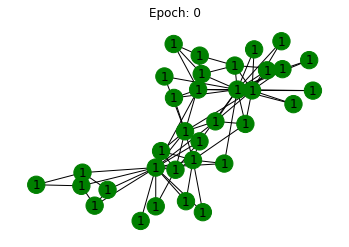

In [347]:
fig, ax = plt.subplots()

def update(i):
  i=int(i)
  
  plt.cla()
  ax.axis('off')
  ax.set_title('Epoch: %d' % i)
  colors=['green' if y==1 else 'pink' for y in all_pred[i] ]
  nx.draw_networkx(G,with_labels=True,labels=dict(zip(node_list,all_pred[i])),node_color=colors,ax=ax,)
  
  
ani = FuncAnimation(fig, func = update, frames=np.arange(0,epochs_num,epochs_num/10),interval=200, repeat=False)
display(ani)


In [348]:
from matplotlib import rc
rc('animation', html='jshtml')

In [349]:
ani

Lets fix the position of nodes:

In [ ]:
import random

In [229]:
from matplotlib.pyplot import Circle

In [ ]:
fig, ax = plt.subplots()
pos_list=[(0,.5)]+[(random.uniform(0.1, 1.9), random.uniform(0.0, 1)) for i in range(1,33)]+[(2,.5)]
def update(i):
  i=int(i)
  
  plt.cla()
  ax. set_aspect('equal')
  ax.axis('off')
  ax.set_title(f'Epoch: {i}, acc={all_acc[i]}')
  colors=['limegreen' if y==1 else 'pink' for y in all_pred[i] ]
  nx.draw_networkx(G,with_labels=True,labels=dict(zip(node_list,node_list)),node_color=colors,ax=ax,pos=dict(zip(node_list,pos_list)))
  # ax.scatter(0,.5,s=200,color='deeppink')
  ax.add_patch(plt.Circle((0,.5), 0.08, color='crimson',
                          alpha=0.7
                          ))
  ax.add_patch(plt.Circle((2,.5), 0.08, color='darkgreen', 
                          # alpha=0.8
                          ))
  ax.text(-.45,.5,'Instructor',fontdict={'color':'crimson'})
  ax.text(2.085,.5,'Administrator',fontdict={'color':'darkgreen'})
  
ani = FuncAnimation(fig, func = update, frames=np.arange(0,epochs_num,epochs_num/10),interval=700, repeat=False)
display(ani)


In [351]:
ani

In [354]:
#Saving the animation
import matplotlib.animation as animation
writervideo = animation.FFMpegWriter(fps=1)
ani.save('karate.mp4', writer=writervideo)
plt.close()

In [ ]:
# ani.save('myAnimation.gif', writer='imagemagick', fps=30)